# TestCase 4

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config4.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 4
# version : 1
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
high_degree = 10

In [4]:
assert testcase == 4
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/version"+str(version)
if version==1:
    from testcases.networks.test_2D.test_4.test_4_v1 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase4
problem = TestCase4(version=version)

Using device: cpu
torch loaded; device is cpu


2
[[-0.5, 0.500001], [-0.5, 0.500001]]
[[-0.5, 0.500001], [-0.5, 0.500001]]
>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe4.pth
network loaded
Error  tensor([0.0006])


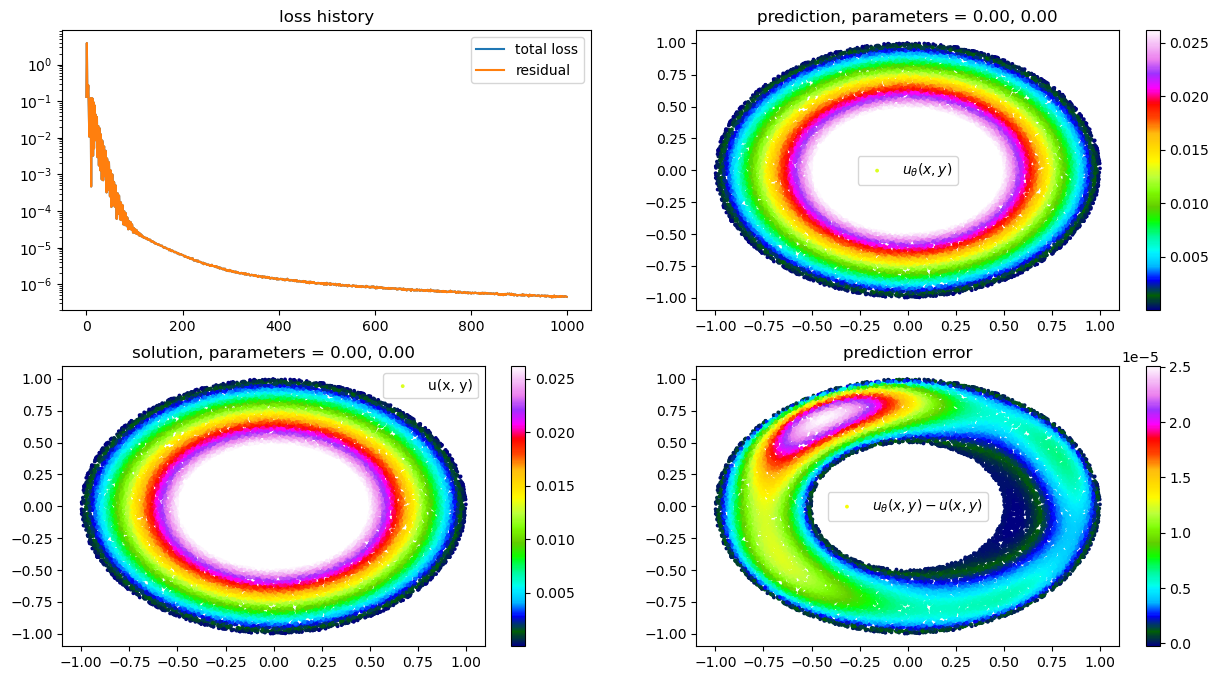

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [13]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

In [14]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/


### Run FEM

In [15]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=0.007788651786490482
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=0.0011730982341129205
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
nb_vert=64, norme_L2=0.00034787058134452375
Computed bounding box tree with 12455 nodes for 6228 points.
V created with  128  vertices and degree  4  : h = 0.021977

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree1.csv
## Run error estimation with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=0.00016783681451993927
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
nb_vert=32, norme_L2=2.214472566479969e-05
Computed bounding box tree with 3139 nodes for 1570 points.
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box tr

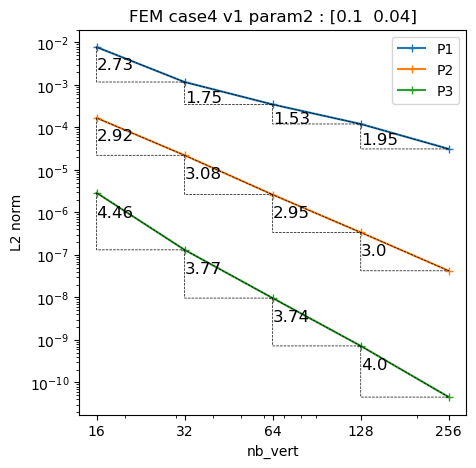

In [16]:
error_estimations.run_fem_alldeg(new_run=False,plot_cvg=True)

### Run Add

In [17]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
nb_vert=16, norme_L2=4.5733848440749756e-05
Computed bounding box tree with 746807 nodes for 373404 points.
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=1.240257419114214e-05
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box tree with 12455 nodes for 6228 points.
nb_vert=64, norme_L2=3.195960063283164e-06
V created with  128  vertices and degree  4  : h = 0.0219

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/Corr_case4_v1_param2_degree1.csv
## Run error estimation with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
V created with  16  vertices and degree  4  : h = 0.16663035129479017
Building point search tree to accelerate distance queries.
Computed bounding box tree with 809 nodes for 405 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
nb_vert=16, norme_L2=2.1610557897407248e-06
V created with  32  vertices and degree  4  : h = 0.08691933730437637
Building point search tree to accelerate distance queries.
Computed bounding box tree with 3139 nodes for 1570 points.
nb_vert=32, norme_L2=3.001068207066755e-07
V created with  64  vertices and degree  4  : h = 0.04347038548979546
Building point search tree to accelerate distance queries.
Computed bounding box 

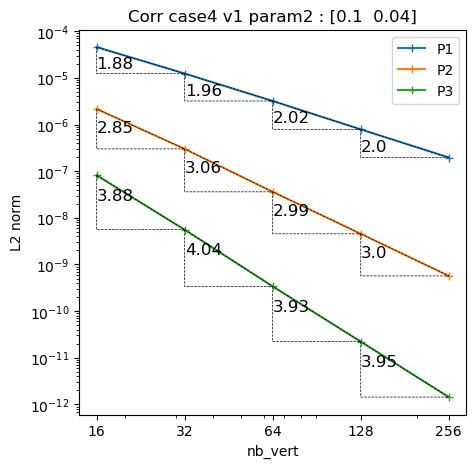

In [18]:
error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=True)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/cvg/param2/FEM_case4_v1_param2_degree3.csv


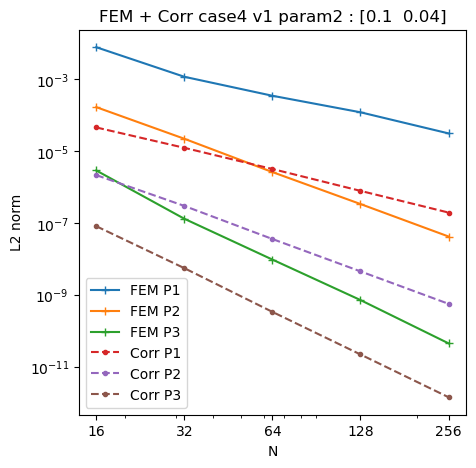

In [19]:
compare_methods.plot_Corr_vs_FEM_alldeg()

In [20]:
compare_methods.save_tab_alldeg_allM()

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/comp

## Gains

### Imports

In [10]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir)
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Run errrors with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 1369 nodes for 685 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.06893171898161234
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 4947 nodes for 2474 points.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [13]:
gains_enhanced_fem.run_fem_alldeg(new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree1.csv
## Run errrors with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
1 Computed bounding box tree with 1369 nodes for 685 points.
Building point search tree to accelerate distance queries.
Computed bounding box tree with 746807 nodes for 373404 points.
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  2  : h = 0.06893171898161234
0 Building point search tree to accelerate distance queries.1
Computed bounding box tree with 4947 nodes for 2474 points.
 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33

### Run PINNs

In [14]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Run errrors with PINNs for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
1 Computed bounding box tree with 746807 nodes for 373404 points.
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.06893171898161234
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [15]:
gains_enhanced_fem.run_pinns_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/PINNs_errors_case4_v1_degree1.csv
## Run errrors with PINNs for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
1 Computed bounding box tree with 746807 nodes for 373404 points.
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  2  : h = 0.06893171898161234
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 ## Run errrors with PINNs for degree=3
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  3  : h = 0.13314

### Run Add

In [16]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  1  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 1369 nodes for 685 points.
Building point search tree to accelerate distance queries.
1 Computed bounding box tree with 746807 nodes for 373404 points.
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  1  : h = 0.06893171898161234
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 4947 nodes for 2474 points.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [17]:
gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

## Read csv file : /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/Corr_errors_case4_v1_degree1.csv
## Run errrors with Corr for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.00563376918807859
nb_vert=20
V created with  20  vertices and degree  2  : h = 0.13314799984383346
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 1369 nodes for 685 points.
1Building point search tree to accelerate distance queries.
 Computed bounding box tree with 746807 nodes for 373404 points.
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 nb_vert=40
V created with  40  vertices and degree  2  : h = 0.06893171898161234
0 Building point search tree to accelerate distance queries.
Computed bounding box tree with 4947 nodes for 2474 points.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

### Compare methods

In [18]:
degree = 1
# df_errors = compare_gains_methods.create_dferrors_deg_allM(degree)
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree1.csv


In [19]:
compare_gains_methods.create_dataframes_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree2.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree3.csv


In [20]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree1.csv
method         PINNs                          FEM                       
type             min     max   mean    std    min     max    mean    std
method n_vert                                                           
Corr   20      10.18   35.80  19.48   6.86  71.19  254.38  153.47  39.72
       40      33.33  124.96  65.60  23.77  63.96  199.99  131.09  31.18


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


In [21]:
compare_gains_methods.save_stats_alldeg_allM()

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree1.csv
method         PINNs                          FEM                       
type             min     max   mean    std    min     max    mean    std
method n_vert                                                           
Corr   20      10.18   35.80  19.48   6.86  71.19  254.38  153.47  39.72
       40      33.33  124.96  65.60  23.77  63.96  199.99  131.09  31.18


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree2.csv
method           PINNs                               FEM                     
type               min      max     mean      std    min    max   mean    std
method n_vert                                                                
Corr   20       189.13  1331.21   485.98   266.88  32.47  80.71  59.00  12.78
       40      1241.81  9690.38  3262.55  1957.69  30.57  74.19  54.11  11.85


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase4/version1/gains/FEM_errors_case4_v1_degree3.csv
method            PINNs                                     FEM                \
type                min        max       mean        std    min    max   mean   
method n_vert                                                                   
Corr   20       5618.39   39577.94   14961.92    7735.92  15.76  32.17  23.12   
       40      74552.75  571907.22  201967.04  112924.16  13.72  29.62  20.64   

method               
type            std  
method n_vert        
Corr   20      4.37  
       40      4.10  


/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
